In [1]:
from tensorflow import keras # type: ignore

from tensorflow.keras import models # type: ignore
from tensorflow.keras import layers # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore

import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore

In [2]:
def avg(lista):
    return np.array(lista).mean()

def std(lista):
    return np.array(lista).std()

In [18]:
# number of simulations

nsim=10

# sighz/hz value

sig_list = [.008, .01, 0.03, 0.05, 0.08]
# sig_list = [.08]
# number of data points Nz

nz_list = [20, 30, 50, 80]
# nz_list = [80]
# Hubble Constant fiducial value for the simulated data - follows the dimensionless notation, i.e., h = H0/(100 km/s/Mpc)

h = 67.36

# creating an array that will receive the reconstruction results

h0s = []
results = []

# looping through nsim, sig_list and nz_list
for sig in sig_list:
    for nz in nz_list:
        h0s.clear()
        for n in range(nsim):

            # loading simulated H(z) data

            if sig >= 0.01:
                dataset=pd.read_csv('input/sigh0p0'+str(int(sig*100))+'/hz_sim_sigh0p0'+str(int(sig*100))+'_'+str(nz)+'pts_h0p6736_zmin10_zmax150_mc#'+str(n+1)+'.txt', delim_whitespace=True,header=None, names=['z_arr', 'hz_arr', 'sighz_arr'])

            if sig < 0.01 and sig > 0:
                dataset=pd.read_csv('input/sigh0p00'+str(int(sig*1000))+'/hz_sim_sigh0p00'+str(int(sig*1000))+'_'+str(nz)+'pts_h0p6736_zmin10_zmax150_mc#'+str(n+1)+'.txt', delim_whitespace=True,header=None, names=['z_arr', 'hz_arr', 'sighz_arr'])

            # sig = -1 means the real data

            # if sig == -1:
            #     dataset=pd.read_csv('input/sighz/hz_sim_sighz_31pts_mc#'+str(n+1)+'.dat', delim_whitespace=True)

            # defining the features

            z_train = dataset['z_arr']
            hz_train = dataset['hz_arr']
            errhz = dataset['sighz_arr']


            # reshaping both arrays

            z_train = z_train.to_numpy()
            z_train = z_train.reshape(nz, 1)
            z_train = z_train.reshape(z_train.shape[0], 1, z_train.shape[1])

            hz_train = hz_train.to_numpy()
            hz_train = hz_train.reshape(nz, 1)
            maximo = hz_train.max()
            hz_train /= maximo

            # defining the RNN model

            model = models.Sequential()
            model.add(layers.Dense(8, input_shape=(z_train.shape[1], z_train.shape[2])))
            # model.add(layers.Dense(16))
            model.add(layers.Dense(1))
            model.compile(loss=keras.losses.MeanSquaredError(), optimizer='adam')

            #model.summary()

            # fitting the model to the whole data

            model.fit(z_train, hz_train, epochs=100, batch_size=4, verbose=2)

            # forecasting H(0). The input for the prediction must be 3-dimensional, hence the three pairs of brackets.

            h0 = model.predict([[[0]]], verbose=0)[0,0]
            

            # appending to a temporary list
            # h0s.append(h0)
            h0s.append(h0*maximo)
        
        # appends the average, the standard deviation, nz and sigz [avg, std, nz, sigz]
        results.append([avg(h0s), std(h0s), nz, sig])



Epoch 1/100
5/5 - 0s - loss: 0.1717 - 318ms/epoch - 64ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1439 - 16ms/epoch - 3ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1201 - 16ms/epoch - 3ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1025 - 17ms/epoch - 3ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0881 - 15ms/epoch - 3ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0774 - 14ms/epoch - 3ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0702 - 16ms/epoch - 3ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0651 - 16ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0608 - 15ms/epoch - 3ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0590 - 15ms/epoch - 3ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0566 - 16ms/epoch - 3ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0550 - 17ms/epoch - 3ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0532 - 17ms/epoch - 3ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0522 - 17ms/epoch - 3ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0504 - 23ms/epoch - 5ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0486 - 21ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 0

In [19]:
results

[[70.06647, 19.18761, 20, 0.008],
 [61.816875, 7.1836133, 30, 0.008],
 [62.31443, 8.475762, 50, 0.008],
 [58.56657, 0.4110173, 80, 0.008],
 [59.173267, 23.118145, 20, 0.01],
 [66.74029, 13.122413, 30, 0.01],
 [66.89933, 13.718127, 50, 0.01],
 [58.548687, 0.35819793, 80, 0.01],
 [69.08181, 15.99008, 20, 0.03],
 [70.215836, 22.41617, 30, 0.03],
 [62.592438, 4.408855, 50, 0.03],
 [58.721992, 0.8512525, 80, 0.03],
 [70.75582, 22.31794, 20, 0.05],
 [60.380882, 4.756084, 30, 0.05],
 [58.392418, 1.5616333, 50, 0.05],
 [57.841454, 1.4602114, 80, 0.05],
 [56.926373, 8.970615, 20, 0.08],
 [58.22483, 18.374643, 30, 0.08],
 [61.329174, 8.052192, 50, 0.08],
 [57.774303, 1.5128417, 80, 0.08]]

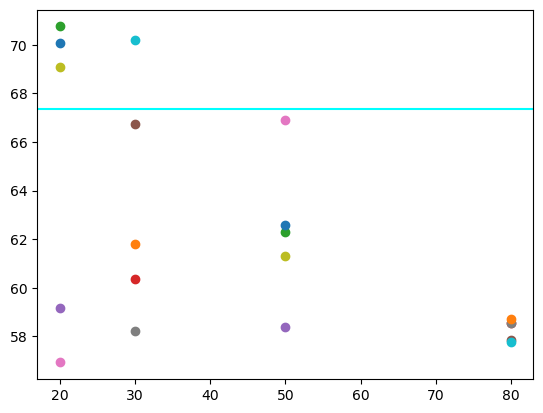

In [20]:
for i in results:
    plt.scatter(i[2], i[0])

# plt.ylim(50, 90)
plt.axhline(67.36, color='cyan')
plt.show()

In [13]:
asda = pd.DataFrame(results, columns=['avg_h0','std','Nz','sig_z'])
asda.to_csv('Results/Dense_results.csv')